

 /device:GPU:0 running...


enter the no. of epochs(it would be good in range(10-20)): 25



************************************************************************************************************************************************


Discriminator Model: 

Model: "model_51"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_label (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_35 (Embedding)        (None, 1, 50)        500         input_label[0][0]                
__________________________________________________________________________________________________
dense_70 (Dense)                (None, 1, 784)       39984       embedding_35[0][0]               
________________________

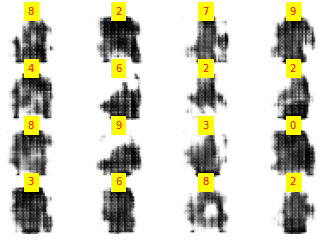

epoch -> [2/25], d_loss_real = 311.2106, d_loss_fake = 311.6700, g_loss = 377.3415


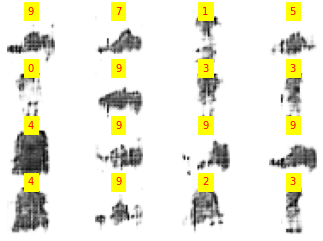

epoch -> [3/25], d_loss_real = 310.5252, d_loss_fake = 308.0026, g_loss = 371.5489


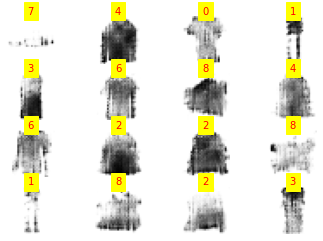

epoch -> [4/25], d_loss_real = 312.3253, d_loss_fake = 312.1026, g_loss = 366.6313


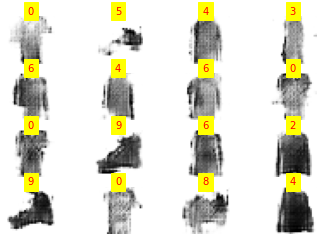

epoch -> [5/25], d_loss_real = 310.3353, d_loss_fake = 308.6425, g_loss = 374.1269


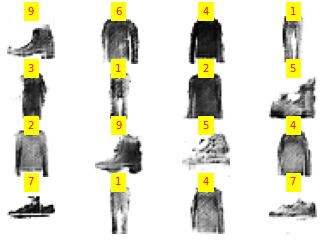

epoch -> [6/25], d_loss_real = 312.2728, d_loss_fake = 310.5091, g_loss = 370.1354


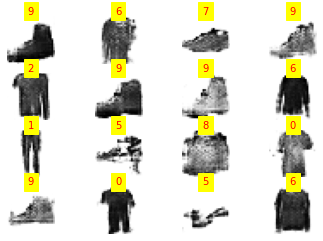

epoch -> [7/25], d_loss_real = 316.2673, d_loss_fake = 313.7096, g_loss = 365.7043


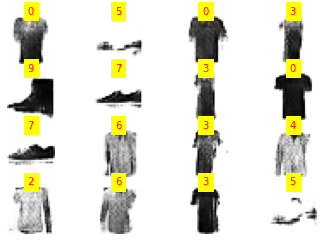

epoch -> [8/25], d_loss_real = 316.7398, d_loss_fake = 315.2001, g_loss = 364.2613


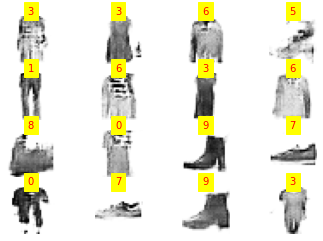

epoch -> [9/25], d_loss_real = 320.2223, d_loss_fake = 318.7286, g_loss = 355.8898


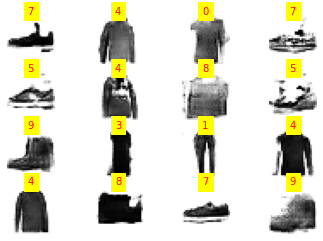

epoch -> [10/25], d_loss_real = 319.5673, d_loss_fake = 317.4052, g_loss = 354.9627


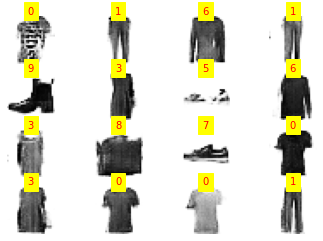

epoch -> [11/25], d_loss_real = 319.9238, d_loss_fake = 317.9337, g_loss = 354.4009


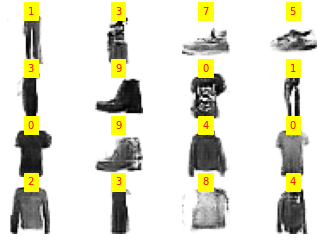

epoch -> [12/25], d_loss_real = 319.7579, d_loss_fake = 318.3069, g_loss = 353.0947


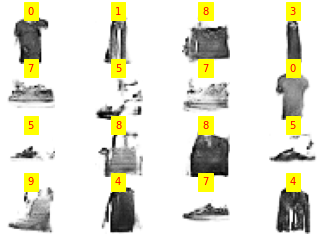

epoch -> [13/25], d_loss_real = 320.4466, d_loss_fake = 319.3107, g_loss = 351.0264


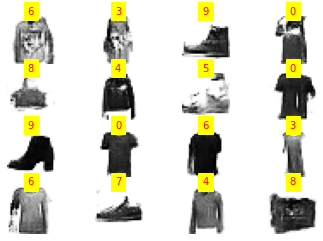

epoch -> [14/25], d_loss_real = 321.8136, d_loss_fake = 320.2106, g_loss = 350.3630


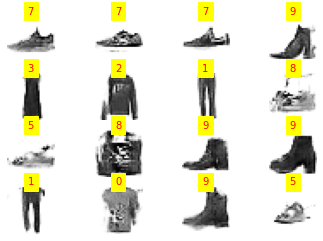

epoch -> [15/25], d_loss_real = 322.1116, d_loss_fake = 320.1968, g_loss = 349.2735


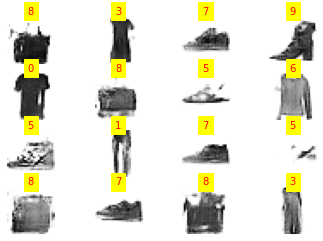

epoch -> [16/25], d_loss_real = 322.7098, d_loss_fake = 320.3483, g_loss = 348.1547


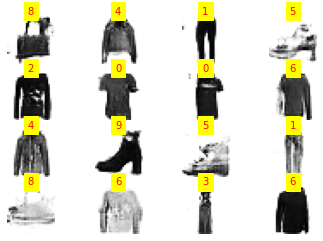

epoch -> [17/25], d_loss_real = 322.2078, d_loss_fake = 320.3275, g_loss = 350.0261


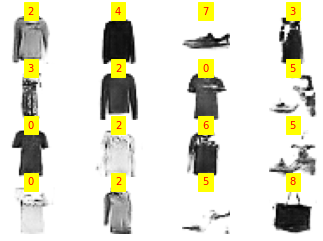

epoch -> [18/25], d_loss_real = 322.1465, d_loss_fake = 320.5766, g_loss = 348.4590


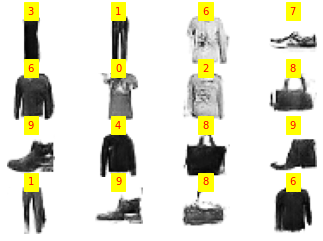

epoch -> [19/25], d_loss_real = 322.5130, d_loss_fake = 321.1360, g_loss = 347.1205


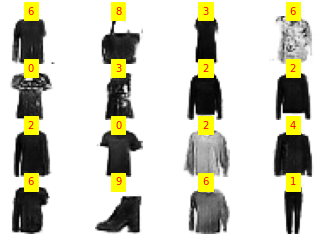

epoch -> [20/25], d_loss_real = 322.6065, d_loss_fake = 321.3413, g_loss = 347.1320


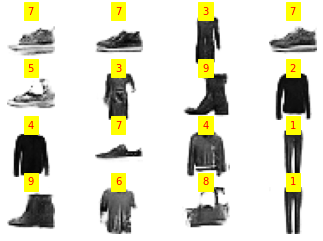

epoch -> [21/25], d_loss_real = 323.2959, d_loss_fake = 321.8194, g_loss = 344.6127


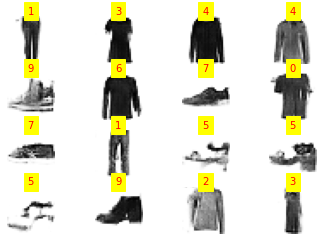

epoch -> [22/25], d_loss_real = 323.3963, d_loss_fake = 322.0086, g_loss = 345.5248


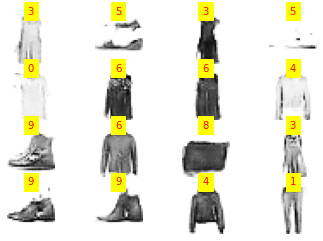

epoch -> [23/25], d_loss_real = 324.0341, d_loss_fake = 322.6566, g_loss = 343.1059


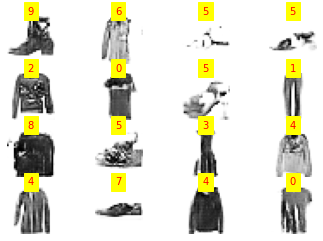

epoch -> [24/25], d_loss_real = 323.9765, d_loss_fake = 322.4045, g_loss = 342.7717


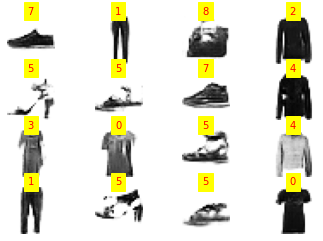

epoch -> [25/25], d_loss_real = 323.2887, d_loss_fake = 322.6163, g_loss = 345.5770


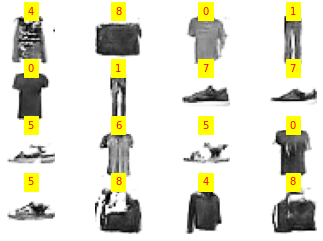

In [27]:
# We are compiling this code on google colab using GPU
# enable GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
with tf.device(device_name):
  print("\n\n",device_name,"running...\n\n")

# import all libreries
import os, keras, numpy
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
from keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import *
from keras.models import load_model

# define discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=10):

  in_label = Input(shape=(1,), name = "input_label")
  li = Embedding(n_classes, 50)(in_label)
  li = Dense(in_shape[0] * in_shape[1])(li)
  li = Reshape((in_shape[0], in_shape[1], 1))(li)

  in_image = Input(shape=in_shape, name = "input_image")

  merge = Concatenate()([in_image, li])

  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
  fe = LeakyReLU(alpha=0.2)(fe)
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  fe = Flatten()(fe)
  fe = Dropout(0.2)(fe)
  out_layer = Dense(1, activation='sigmoid')(fe)

  model = Model([in_image, in_label], out_layer)

  opt = Adam(learning_rate= 3e-4, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

# define generator model
def define_generator(latent_dim = 100, n_classes=10):

  in_label = Input(shape=(1,))
  li = Embedding(n_classes, 50)(in_label)
  li = Dense(7 * 7)(li)
  li = Reshape((7, 7, 1))(li)

  in_lat = Input(shape=(latent_dim,))

  n_nodes = 128 * 7 * 7
  gen = Dense(n_nodes)(in_lat)
  gen = LeakyReLU(alpha=0.2)(gen)
  gen = Reshape((7, 7, 128))(gen)

  merge = Concatenate()([gen, li])

  gen = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same')(merge)
  gen = LeakyReLU(alpha=0.2)(gen)
  gen = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same')(gen)
  gen = LeakyReLU(alpha=0.2)(gen)
  gen = Conv2DTranspose(128, (3,3), strides=(1,1), padding='same')(gen)
  gen = LeakyReLU(alpha=0.2)(gen)
  out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)

  model = Model([in_lat, in_label], out_layer)
  return model


# define GAN model
def define_gan(g_model, d_model):

  d_model.trainable = False

  gen_noise, gen_label = g_model.input
  gen_output = g_model.output

  gan_output = d_model([gen_output, gen_label])

  model = Model([gen_noise, gen_label], gan_output)

  opt = Adam(learning_rate= 3e-4, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt,  metrics=['accuracy'])
  
  return model

# load dataset
def load_real_samples():
  (trainX, trainy), (_, _) = fashion_mnist.load_data()
  # expand to 3d, e.g. add channels
  X = expand_dims(trainX, axis=-1)
  X = X.astype('float32')
  # scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  return [X, trainy]

# plot data
def save_plot(x_input,lebel,n=4):
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.title(str(lebel[i]),fontsize=10,color="red",fontweight=10,pad='2.0',backgroundcolor='yellow')
        plt.imshow(x_input[i,:,:,0], cmap = 'gray_r')
        plt.axis('off')
    plt.show()

# generate batch of real data 
def generate_real_samples(dataset, n_samples):
	images, labels = dataset
	ix = randint(0, images.shape[0], n_samples)
	X, labels = images[ix], labels[ix]
	y = ones((n_samples, 1))
	return [X, labels], y

# generate latent space
def generate_latent_points(latent_dim, n_samples, n_classes=10):
  x_input = randn(latent_dim * n_samples)
  z_input = x_input.reshape(n_samples, latent_dim)
  labels = randint(0, n_classes, n_samples)
  return [z_input, labels]

# generate batch of fake data
def generate_fake_samples(generator, latent_dim, n_samples):
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	images = generator.predict([z_input, labels_input])
	y = zeros((n_samples, 1))
	return [images, labels_input], y

# check the data after each iteration
def summarize_the_model(generator, latent_dim = 100):
  latent_points, labels = generate_latent_points(latent_dim= 100, n_samples= 16)
  X  = generator.predict([latent_points, labels])
  # scale from [-1,1] to [0,1]
  X = (X + 1) / 2.0
  save_plot(X,labels, n=4)


# train the whole model
def train(g_model, d_model, gan_model, dataset, latent_dim= 100, n_epochs=3, n_batch=128):

  bat_per_epo = int(dataset[0].shape[0] / n_batch)
  print("batch per epoch: ", bat_per_epo)
  half_batch = int(n_batch / 2)
  print("half batch: ", half_batch)
  print("*****************\n\n\n")

  for i in range(n_epochs):
    d_loss_r,d_loss_f = 0.0,0.0
    g_loss = 0.0
    
    for j in range(bat_per_epo):

      [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
      d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
      d_loss_r += d_loss1

      [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
      d_loss_f += d_loss2

      [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
      y_gan = ones((n_batch, 1))
      g_loss1,_ = gan_model.train_on_batch([z_input, labels_input], y_gan)
      g_loss += g_loss1
    print('epoch -> [%d/%d], d_loss_real = %.4f, d_loss_fake = %.4f, g_loss = %.4f' %(i+1,n_epochs, d_loss_r, d_loss_f, g_loss))
    summarize_the_model(g_model)

    # save model
    if i == 0:
      # set the PATH according to device
      g_model.save("generator_fashion.h5")
    if g_model:
      # set the PATH according to device
      os.remove("generator_fashion.h5")
      g_model.save("generator_fashion.h5")

def predict_model():
  print("\n\n")
  p=int(input("enter the no. of image: "))
  latent_dim = 100
  n_samples = p*p
  z_input, labels = generate_latent_points(latent_dim, n_samples)
  data = [z_input,labels]
  # set the PATH according to device
  model = load_model('generator_fashion.h5')
  pred = model.predict(data)
  pred = (pred +1 ) / 2.0
  save_plot(pred,labels,n=p)


# main function
if __name__ == "__main__":
  with tf.device(device_name):
    latent_dim = 100
    n_epochs = int(input("enter the no. of epochs(it would be good in range(10-20)): "))
    print("\n\n")
    d_model = define_discriminator()
    print("*"*12**2)
    print("\n\nDiscriminator Model: \n")
    print(d_model.summary())
    g_model = define_generator(latent_dim)
    print("*"*12**2)
    print("\n\nGenarator Model: \n")
    print(g_model.summary())
    gan_model = define_gan(g_model, d_model)
    print("*"*12**2)
    print("\n\nGAN Model: \n")
    print(gan_model.summary())
    dataset = load_real_samples()
    print("*"*12**2)
    print('\n\nREADY TO Train the model... !!!\n\n')
  
    train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs)




enter the no. of image: 4


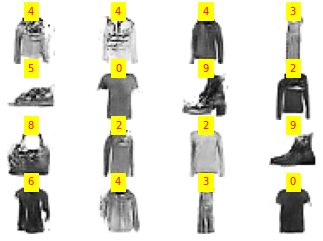

In [28]:
predict_model()

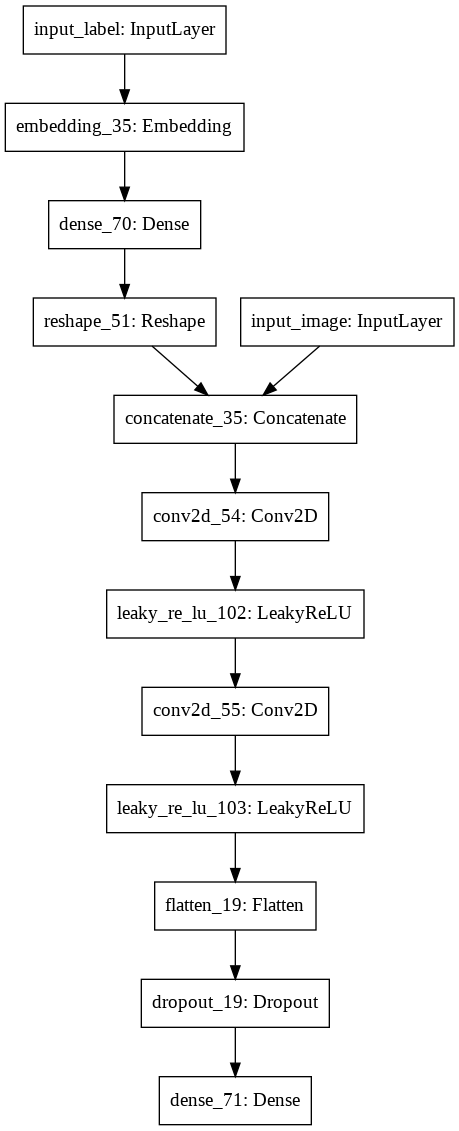

In [29]:
# plot Discriminator Model
tf.keras.utils.plot_model(d_model)

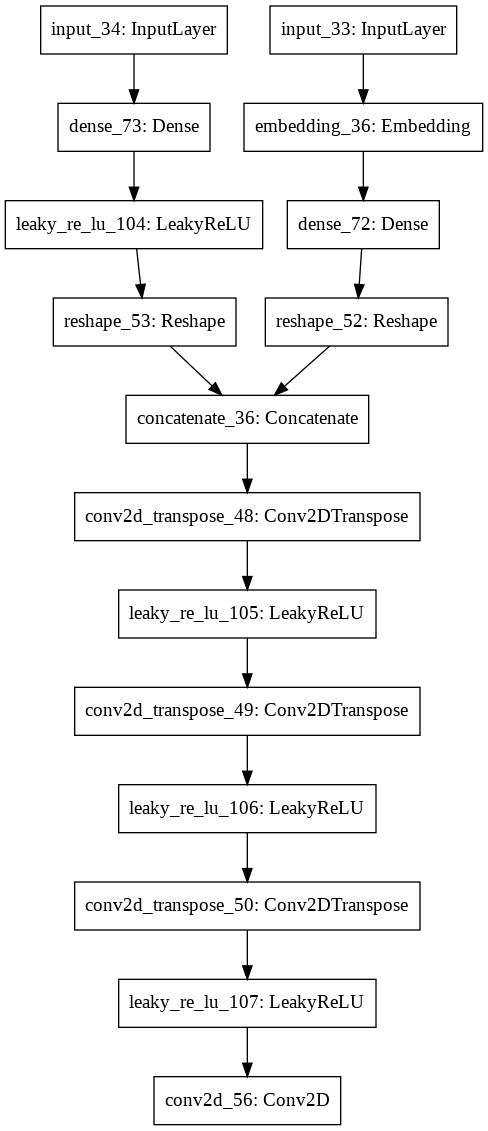

In [30]:
# plot Generator Model
tf.keras.utils.plot_model(g_model)

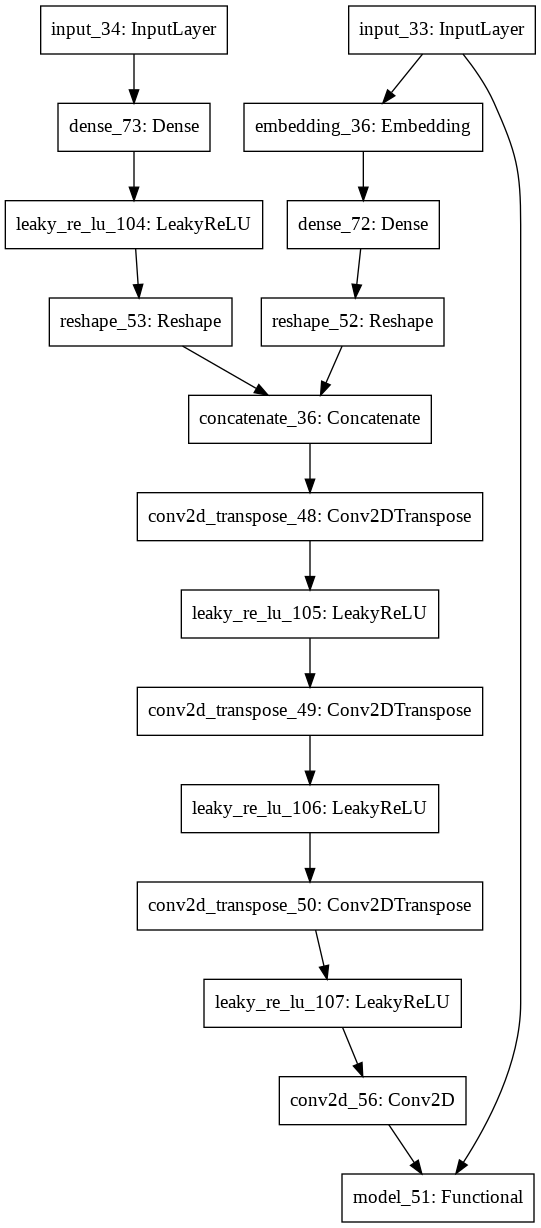

In [31]:
# plot GAN Model
tf.keras.utils.plot_model(gan_model)